In [1]:
from distance import *
import os
import pickle

path_features = f"../ShapeDatabase_INFOMR_features"
class_types = os.listdir(path_features)
class_types = [class_type for class_type in class_types if os.path.isdir(path_features + "/" + class_type) and class_type != ".git"]

feature_vectors = {
    "obj_name": [],
    "class_type": [],
    "feature_vector": []
}
for class_type in class_types:
    path_class_features = os.path.join(path_features, class_type)
    for obj_feature in os.listdir(path_class_features):
        path = os.path.join(path_class_features, obj_feature)
        feature_vector = pickle.load(open(path, "rb"))

        feature_vectors["obj_name"] += [obj_feature]
        feature_vectors["class_type"] += [class_type]
        feature_vectors["feature_vector"] += [feature_vector["feature_vector"]]


In [2]:
import pandas as pd

num_bins = 50
fv_df = pd.DataFrame(feature_vectors)
fv_orig = np.asarray(pd.DataFrame(feature_vectors)["feature_vector"].tolist())
fv = feature_normalization(fv_orig, num_bins=50)

In [3]:
# area, compactness, rectangularity, diameter, convexity, eccentricity, d1, d2, d3, d4, a3

def class_features(df):
    feature_class_dict = {}
    for class_type in df["class_type"].unique():
        aux = df[df["class_type"] == class_type]
        fv_orig = np.asarray(pd.DataFrame(aux)["feature_vector"].tolist())

        area = fv_orig[:,0]
        compactness= fv_orig[:,1]
        rectangularity= fv_orig[:,2]
        diameter= fv_orig[:,3]
        convexity= fv_orig[:,4]
        eccentricity= fv_orig[:,5]
        d1= fv_orig[:,6:num_bins+6]
        d2= fv_orig[:,num_bins+6:num_bins*2+6]
        d3= fv_orig[:,num_bins*2+6:num_bins*3+6]
        d4= fv_orig[:,num_bins*3+6:num_bins*4+6]
        a3= fv_orig[:,num_bins*4+6:num_bins*5+6]

        feature_class_dict[class_type] = {
            "area": area,
            "compactness": compactness,
            "rectangularity": rectangularity,
            "diameter": diameter,
            "convexity": convexity,
            "eccentricity": eccentricity,
            "d1": d1,
            "d2": d2,
            "d3": d3,
            "d4": d4,
            "a3": a3
        }

    return feature_class_dict
feature_class_dict = class_features(fv_df)

In [4]:
fv_df.class_type.unique()

array(['House', 'Car', 'ClassicPiano', 'Apartment', 'MultiSeat',
       'Humanoid', 'Spoon', 'Helicopter', 'DeskPhone', 'Quadruped',
       'Rocket', 'RoundTable', 'Guitar', 'Vase', 'Jet', 'Door',
       'NonWheelChair', 'Mug', 'Drum', 'AircraftBuoyant', 'FloorLamp',
       'Hand', 'Train', 'RectangleTable', 'Monitor', 'Sign', 'Starship',
       'Violin', 'Cellphone', 'Bird', 'TruckNonContainer', 'Knife',
       'ComputerKeyboard', 'WheelChair', 'Bottle', 'PlantIndoors',
       'Bicycle', 'Cup', 'Shelf', 'Ship', 'Fish', 'PianoBoard',
       'Skyscraper', 'Sword', 'HumanHead', 'Wheel',
       'BuildingNonResidential', 'MilitaryVehicle', 'Insect', 'Hat',
       'City', 'PlantWildNonTree', 'Biplane', 'Computer', 'SubmachineGun',
       'Bookset', 'DeskLamp', 'Chess', 'Bed', 'Tree', 'Truck',
       'AquaticAnimal', 'Musical_Instrument', 'Glasses', 'Tool', 'Bus',
       'Monoplane', 'Motorcycle', 'Gun'], dtype=object)

In [5]:
feature_class_dict["House"]["a3"]

array([[0.        , 0.06283172, 0.12566345, ..., 2.95309097, 3.0159227 ,
        3.07875442],
       [0.        , 0.06313246, 0.12626491, ..., 2.96722548, 3.03035794,
        3.0934904 ],
       [0.00319481, 0.06617558, 0.12915634, ..., 2.96329076, 3.02627153,
        3.08925229],
       ...,
       [0.        , 0.06358427, 0.12716854, ..., 2.98846067, 3.05204494,
        3.11562921],
       [0.        , 0.06238761, 0.12477522, ..., 2.93221764, 2.99460525,
        3.05699286],
       [0.        , 0.06275919, 0.12551838, ..., 2.94968197, 3.01244116,
        3.07520035]])

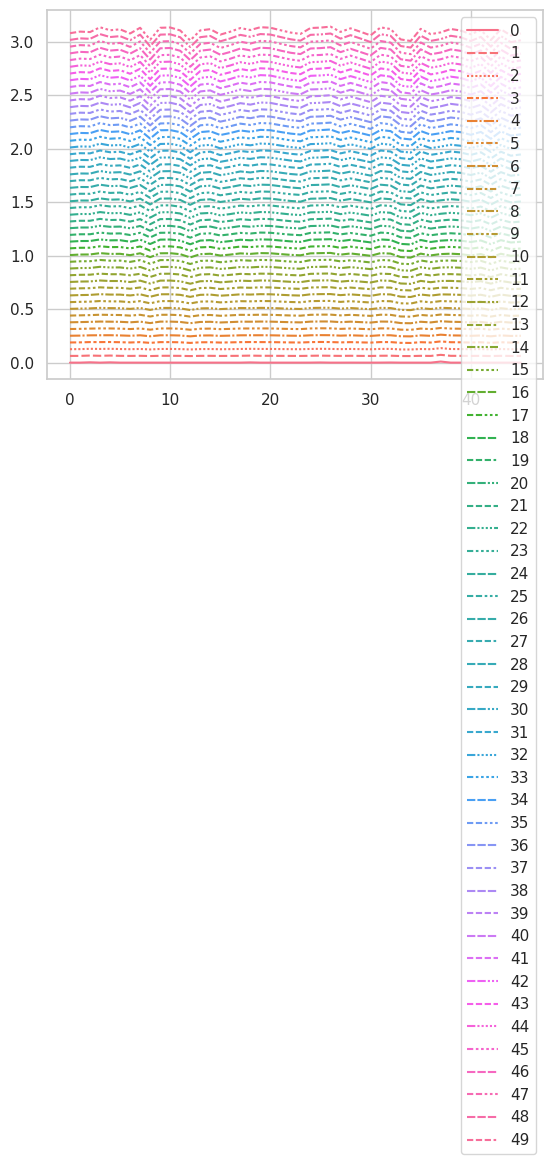

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

def kde_plot_feature(array):
    sns.lineplot(array, color="black")
    plt.show()

kde_plot_feature(feature_class_dict["House"]["a3"])
# kde_plot_feature(feature_class_dict["Ship"]["a3"])
# kde_plot_feature(feature_class_dict["Wheel"]["a3"])

# House - squareish, with some sticking parts
# Ship - long and thin, with some sticking stuff
# Wheel - round, possibly with gears sticking out

In [7]:
fv_df[fv_df["obj_name"] == "m1441.pickle"]

,obj_name,class_type,feature_vector
1536,m1441.pickle,Ship,"[0.9927804709219755, 26.560514506527163, 0.182..."


In [8]:
fv_df["feature_vector"] = fv.tolist()
fv_df["feature_vector"] = fv_df["feature_vector"].apply(np.asarray)
fv_df.to_pickle("../ShapeDatabase_INFOMR_features/feature_vector_df_normalized.pickle")
fv_df

,obj_name,class_type,feature_vector
0,D00415.pickle,House,"[2.880828836211811, -0.020085883249595912, 1.6..."
1,m456.pickle,House,"[-0.19153736003925034, -0.020085895391250955, ..."
2,D00091.pickle,House,"[1.4856641049775514, -0.02008589487072271, 2.7..."
3,m449.pickle,House,"[0.3708849285736628, -0.02008589567152444, 1.3..."
4,m434.pickle,House,"[0.36065951073474434, -0.020085896171796676, 1..."
...,...,...,...
2478,D00153.pickle,Gun,"[-0.7170523808294326, -0.02008589451194525, 0...."
2479,m672.pickle,Gun,"[-0.8563452143268946, -0.020085892239940503, 0..."
2480,m659.pickle,Gun,"[-0.8019874595077906, -0.0200858918594352, -0...."
2481,m682.pickle,Gun,"[-0.7578412427685349, -0.020085878998180352, 0..."


In [9]:
query_idx = 0
fv_df.iloc[query_idx]

obj_name                                              D00415.pickle
class_type                                                    House
feature_vector    [2.880828836211811, -0.020085883249595912, 1.6...
Name: 0, dtype: object

In [10]:
dists = []
for v in fv[:]:
    dists += [distance(fv[query_idx], v, 50, np.ones(11))]

dists_idx = np.argsort(dists)[:6]
dists_idx

/home/keddie/anaconda3/envs/mr_project/lib/python3.12/site-packages/scipy/spatial/distance.py:1271: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


array([   0,   16, 2167,    9,   52, 2070])

In [11]:
fv_df.loc[dists_idx]

,obj_name,class_type,feature_vector
0,D00415.pickle,House,"[2.880828836211811, -0.020085883249595912, 1.6..."
16,D00389.pickle,House,"[3.3319952277329365, -0.020083823492425157, 1...."
2167,D00307.pickle,Bed,"[2.109106871642341, -0.02008587380754608, 1.11..."
9,D00001.pickle,House,"[2.844539666825117, -0.016396752203080393, 0.7..."
52,D00299.pickle,Car,"[3.4859101797671985, -0.02008586595142296, 1.9..."
2070,D01050.pickle,Bookset,"[2.6448607948450777, -0.02008589173531114, 1.2..."


In [12]:
from vedo import * 
from MeshObject import * 
path_shapes = f"../ShapeDatabase_INFOMR"

plt = Plotter(shape=[1,6], sharecam=False)
for idx_plot, idx_dist in zip(range(6), dists_idx):
    plt.at(idx_plot)
    path = os.path.join(path_shapes, fv_df.iloc[idx_dist]["class_type"], fv_df.iloc[idx_dist]["obj_name"].removesuffix(".pickle") + ".obj")
    text = Text2D(f"class={fv_df.loc[idx_dist]['class_type']}; dist={dists[idx_dist]}")
    mesh = MeshObject(path, visualize=True)
    plt += [mesh, text]
plt.show().interactive()

In [13]:
class_subset_1 = ["Ship", "House", "Tool", "Sign", "Door", "Car", "Monoplane", "Cellphone", "Knife", "Bus", "Humanoid", "Mug"]
fv_df_aux = fv_df[fv_df["class_type"].isin(class_subset_1)]
idx_aux = fv_df_aux.index.to_numpy()

In [14]:
# be detailed during the presentation wrt tsne - explain why shapes might be in a cluster
from sklearn.manifold import TSNE

x = TSNE(n_components=2).fit_transform(fv)
pickle.dump(x, open("../ShapeDatabase_INFOMR_features/tsne_2d_components.pickle", "wb"))
xlim_min, xlim_max = np.min(x[:,0]), np.max(x[:,0])
ylim_min, ylim_max = np.min(x[:,1]), np.max(x[:,1])

In [15]:
plot_labels = [f"{class_type}\n{obj_name}" for class_type, obj_name in zip(fv_df_aux.class_type.tolist(), fv_df_aux.obj_name.tolist())]
class_labels = fv_df_aux.class_type.tolist()

In [16]:
import matplotlib
%matplotlib qt
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

sns.set_theme(style="whitegrid")

sns_colors = [
    "#FB5012", "#01FDF6", "#CBBAED", "#E9DF00", "#03FCBA", "#08415C",
    "#6610F2", "#E6AD29", "#187FC9", "#A85751", "#A6D9F7", "#57CC99"
]

plt.figure(figsize=(16,9))
ax = sns.scatterplot(x=x[:,0][idx_aux], y=x[:,1][idx_aux], hue=class_labels, legend=True, palette=sns_colors)
plt.legend(loc="upper left", bbox_to_anchor = (1.05, 1))

highlight_kwargs = dict(
    # color="red",
    markeredgecolor="black",
    linewidth=1,
    markeredgewidth=3,
    # PathCollection.
    # facecolor="black",
    edgecolor="black",
)

annotation_kwargs = dict(
    bbox=dict(
        boxstyle="round,pad=.5",
        fc="orange",
        alpha=.7,
        ec="k",
    ),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3",
        shrinkB=0,
        ec="k",
    ),
    ma="center"
)

# print(ylim_min, ylim_max, plt.ylim())
# print(xlim_min, xlim_max, plt.xlim())

# plt.xlim(xlim_min, xlim_max)
# plt.ylim(ylim_min, ylim_max)

cursor = mplcursors.cursor(ax, hover=True, highlight=True, highlight_kwargs=highlight_kwargs, annotation_kwargs=annotation_kwargs)
cursor.connect(
    "add", lambda x: x.annotation.set(text=plot_labels[x.index])
)


plt.show()